In [7]:
import numpy as np
import random

START = 0
GOAL = 8
OBSTACLE = 4

n_states = 9
n_actions = 4  # 0:left, 1:down, 2:right, 3:up

def step(state, action):
    row, col = divmod(state, 3)

    if action == 0:  # left
        new_col, new_row = max(col - 1, 0), row
    elif action == 1:  # down
        new_row, new_col = min(row + 1, 2), col
    elif action == 2:  # right
        new_col, new_row = min(col + 1, 2), row
    elif action == 3:  # up
        new_row, new_col = max(row - 1, 0), col

    new_state = new_row * 3 + new_col

    if new_state == GOAL:
        return new_state, 10, True
    if new_state == OBSTACLE:
        return new_state, -10, False

    return new_state, -1, False


In [10]:
import matplotlib.pyplot as plt

alpha = 0.9
gamma = 0.9
epsilon = 1.0
min_epsilon = 0.01
decay_rate = 0.001

episodes = 5000
max_steps = 50

Q = np.zeros((n_states, n_actions))
rewards = []

for ep in range(episodes):
    state = START
    total_reward = 0

    for step_i in range(max_steps):
        if random.uniform(0, 1) < epsilon:
            action = random.randint(0, n_actions - 1)
        else:
            action = np.argmax(Q[state])

        new_state, reward, done = step(state, action)

        Q[state, action] = (1 - alpha) * Q[state, action] + alpha * (reward + gamma * np.max(Q[new_state]))

        state = new_state
        total_reward += reward

        if done:
            break

    epsilon = min_epsilon + (1.0 - min_epsilon) * np.exp(-decay_rate * ep)
    rewards.append(total_reward)

print("Q-Table Akhir:")
print(np.round(Q, 2))


Q-Table Akhir:
[[ 3.12  4.58  4.58  3.12]
 [ 3.12 -2.8   6.2   4.58]
 [ 4.58  8.    6.2   6.2 ]
 [ 4.58  6.2  -2.8   3.12]
 [ 4.58  8.    8.    4.58]
 [-2.8  10.    8.    6.2 ]
 [ 6.2   6.2   8.    4.58]
 [ 6.2   8.   10.   -2.8 ]
 [ 0.    0.    0.    0.  ]]


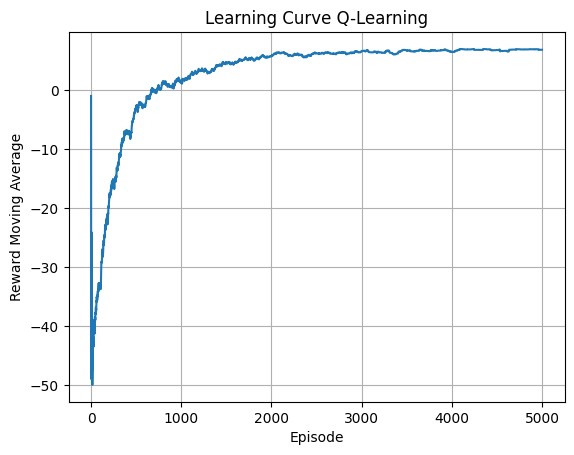

In [11]:
import pandas as pd

rewards_ma = pd.Series(rewards).rolling(100, min_periods=1).mean()

plt.plot(rewards_ma)
plt.title("Learning Curve Q-Learning")
plt.xlabel("Episode")
plt.ylabel("Reward Moving Average")
plt.grid(True)
plt.show()


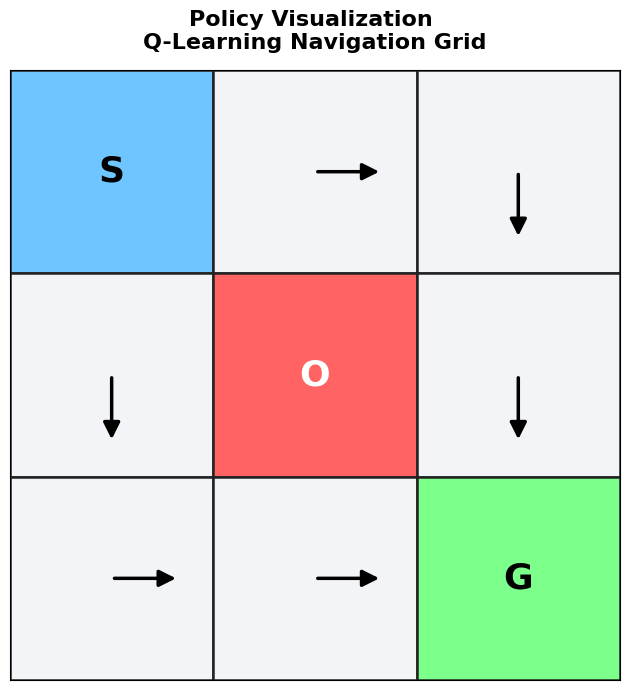

In [12]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import FancyArrowPatch, Rectangle

policy_raw = np.argmax(Q, axis=1)

# Mapping aksi ke vector (dx, dy)
vector_map = {
    0: (-0.55, 0),   # left
    1: (0, -0.55),   # down
    2: (0.55, 0),    # right
    3: (0, 0.55)     # up
}

# Warna sel
COLOR_START = "#6EC5FF"
COLOR_OBS   = "#FF6363"
COLOR_GOAL  = "#7DFF8C"
COLOR_CELL  = "#F2F4F7"   # sel biasa

fig, ax = plt.subplots(figsize=(7,7))

# Membuat grid background
for i in range(3):
    for j in range(3):
        state = i * 3 + j

        # posisi box
        box = Rectangle(
            (j, 2-i), 1, 1,
            linewidth=1.8,
            edgecolor="#222222",
            facecolor=COLOR_CELL,
            zorder=1
        )

        # Tentukan warna khusus
        if state == START:
            box.set_facecolor(COLOR_START)
        elif state == OBSTACLE:
            box.set_facecolor(COLOR_OBS)
        elif state == GOAL:
            box.set_facecolor(COLOR_GOAL)

        ax.add_patch(box)

# Menambahkan label S, O, G
for i in range(3):
    for j in range(3):
        state = i*3 + j
        cx, cy = j + 0.5, 2.5 - i

        if state == START:
            ax.text(cx, cy, "S", fontsize=26, weight="bold",
                    ha="center", va="center", color="black")
        elif state == OBSTACLE:
            ax.text(cx, cy, "O", fontsize=26, weight="bold",
                    ha="center", va="center", color="white")
        elif state == GOAL:
            ax.text(cx, cy, "G", fontsize=26, weight="bold",
                    ha="center", va="center", color="black")

# Tambahkan panah kebijakan
for i in range(3):
    for j in range(3):
        state = i*3 + j

        if state in [START, OBSTACLE, GOAL]:
            continue

        cx, cy = j + 0.5, 2.5 - i
        dx, dy = vector_map[policy_raw[state]]

        arrow = FancyArrowPatch(
            (cx, cy),
            (cx + dx*0.6, cy + dy*0.6),
            arrowstyle='-|>', 
            mutation_scale=25,
            linewidth=2.5,
            color="black"
        )
        ax.add_patch(arrow)

# Style grid
ax.set_xlim(0, 3)
ax.set_ylim(0, 3)
ax.set_xticks([])
ax.set_yticks([])
ax.set_aspect('equal')

# Judul estetis
plt.title(
    "Policy Visualization \nQ-Learning Navigation Grid",
    fontsize=16,
    weight='bold',
    pad=15
)

plt.tight_layout()
plt.show()
